In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from torch.utils.data import DataLoader
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import column, row
from bokeh.models import Div

from attrbench.evaluation.independent import sensitivity_n
from experiments.lib.util import get_ds_model, get_mask_range, get_methods

In [14]:
def imshow(img, title):
    npimg = torchvision.utils.make_grid(img).cpu().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

def attrshow(attrs, title):
    npattrs = attrs.squeeze().detach().cpu().numpy()  # [batch_size, rows, cols]
    npattrs = np.concatenate(npattrs, axis=-1)
    min_value = min(np.min(npattrs), -.01)
    max_value = max(np.max(npattrs), .01)
    divnorm = colors.TwoSlopeNorm(vmin=min_value, vcenter=0., vmax=max_value)
    plt.imshow(npattrs, cmap="bwr", norm=divnorm)
    plt.colorbar(orientation="horizontal")
    plt.title(title)
    plt.show()
    
def show_img_attrs(imgs, attrs):
    imshow(imgs, "Images")
    attrshow(attrs, "Attributions")

# Initialization and parameters

In [15]:
BATCH_SIZE = 4
DATASET = "MNIST"
MODEL = "CNN"
METHOD = "InputXGradient"
N_PERTURBATIONS = 16

device = "cuda" if torch.cuda.is_available() else "cpu"
dataset, model = get_ds_model(DATASET, MODEL)
methods = get_methods(model, BATCH_SIZE, dataset.sample_shape[-2:],
                      aggregation_fn="avg", methods=[METHOD])
method = methods[METHOD]
model.to(device)
for param in model.parameters():
    param.requires_grad = False
model.eval()
mask_range = get_mask_range(DATASET)

# Run Sensitivity-n

In [16]:
batch, labels = next(iter(DataLoader(dataset, BATCH_SIZE, num_workers=4)))
batch = batch.to(device)
labels = labels.to(device)
sens_n, debug_data = sensitivity_n(batch, labels, model, method,
                                    mask_range[1:], N_PERTURBATIONS, 0., debug_mode=True)

# Plot results

## Plot the original samples and their attributions

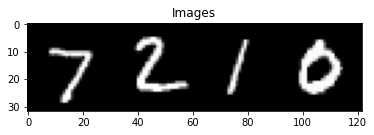

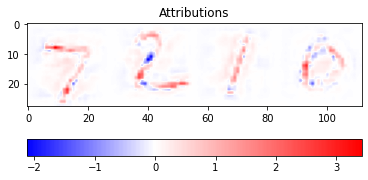

In [19]:
show_img_attrs(dataset.denormalize(batch), debug_data["attrs"])

## Plot perturbed samples and values for each perturbation step

n: 25
[[130 295 279 ... 295 173 246]
 [ 15  35 706 ... 529 143 538]
 [218 144 168 ... 395  11  15]
 [472 249 728 ... 730 310 262]]


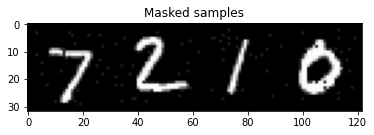

[[639 472 318 ...  81 780  91]
 [266  39 629 ... 139 476 394]
 [511 302 655 ... 505 192 456]
 [412 587 695 ... 158 456 250]]


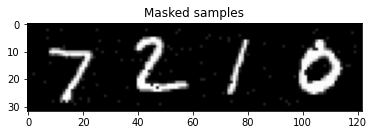


n: 50
[[130 295 279 ... 295 173 246]
 [ 15  35 706 ... 529 143 538]
 [218 144 168 ... 395  11  15]
 [472 249 728 ... 730 310 262]]


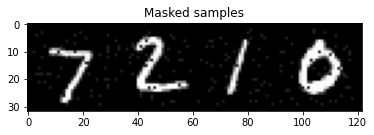

[[639 472 318 ...  81 780  91]
 [266  39 629 ... 139 476 394]
 [511 302 655 ... 505 192 456]
 [412 587 695 ... 158 456 250]]


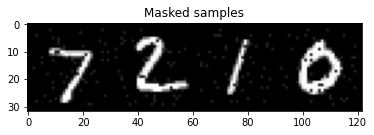


n: 75
[[130 295 279 ... 295 173 246]
 [ 15  35 706 ... 529 143 538]
 [218 144 168 ... 395  11  15]
 [472 249 728 ... 730 310 262]]


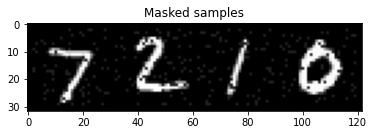

[[639 472 318 ...  81 780  91]
 [266  39 629 ... 139 476 394]
 [511 302 655 ... 505 192 456]
 [412 587 695 ... 158 456 250]]


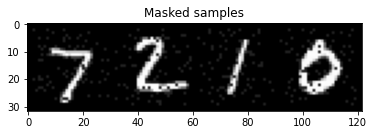


n: 100
[[130 295 279 ... 295 173 246]
 [ 15  35 706 ... 529 143 538]
 [218 144 168 ... 395  11  15]
 [472 249 728 ... 730 310 262]]


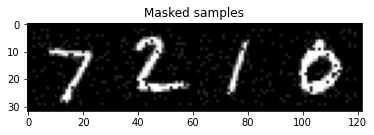

[[639 472 318 ...  81 780  91]
 [266  39 629 ... 139 476 394]
 [511 302 655 ... 505 192 456]
 [412 587 695 ... 158 456 250]]


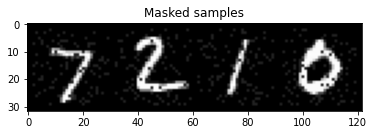


n: 125
[[130 295 279 ... 295 173 246]
 [ 15  35 706 ... 529 143 538]
 [218 144 168 ... 395  11  15]
 [472 249 728 ... 730 310 262]]


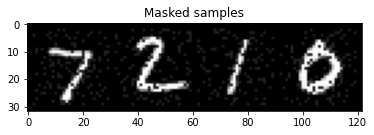

[[639 472 318 ...  81 780  91]
 [266  39 629 ... 139 476 394]
 [511 302 655 ... 505 192 456]
 [412 587 695 ... 158 456 250]]


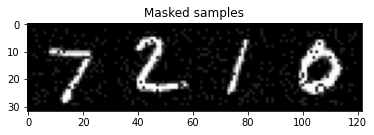


n: 150
[[130 295 279 ... 295 173 246]
 [ 15  35 706 ... 529 143 538]
 [218 144 168 ... 395  11  15]
 [472 249 728 ... 730 310 262]]


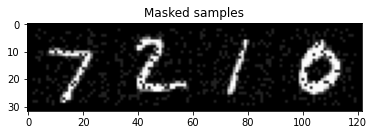

[[639 472 318 ...  81 780  91]
 [266  39 629 ... 139 476 394]
 [511 302 655 ... 505 192 456]
 [412 587 695 ... 158 456 250]]


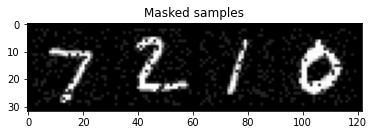


n: 175
[[130 295 279 ... 295 173 246]
 [ 15  35 706 ... 529 143 538]
 [218 144 168 ... 395  11  15]
 [472 249 728 ... 730 310 262]]


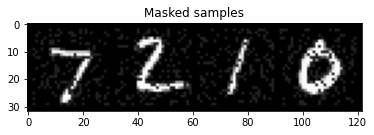

[[639 472 318 ...  81 780  91]
 [266  39 629 ... 139 476 394]
 [511 302 655 ... 505 192 456]
 [412 587 695 ... 158 456 250]]


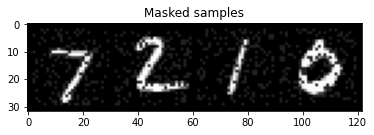


n: 200
[[130 295 279 ... 295 173 246]
 [ 15  35 706 ... 529 143 538]
 [218 144 168 ... 395  11  15]
 [472 249 728 ... 730 310 262]]


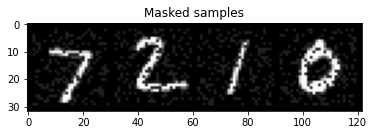

[[639 472 318 ...  81 780  91]
 [266  39 629 ... 139 476 394]
 [511 302 655 ... 505 192 456]
 [412 587 695 ... 158 456 250]]


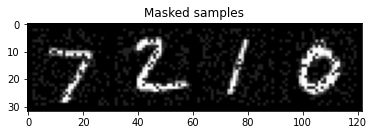


n: 225
[[130 295 279 ... 295 173 246]
 [ 15  35 706 ... 529 143 538]
 [218 144 168 ... 395  11  15]
 [472 249 728 ... 730 310 262]]


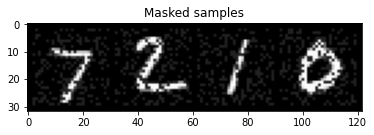

[[639 472 318 ...  81 780  91]
 [266  39 629 ... 139 476 394]
 [511 302 655 ... 505 192 456]
 [412 587 695 ... 158 456 250]]


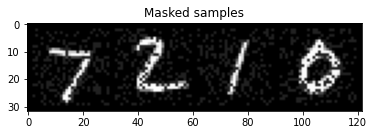


n: 250
[[130 295 279 ... 295 173 246]
 [ 15  35 706 ... 529 143 538]
 [218 144 168 ... 395  11  15]
 [472 249 728 ... 730 310 262]]


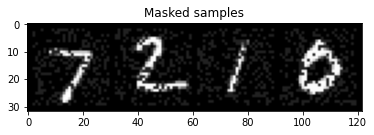

[[639 472 318 ...  81 780  91]
 [266  39 629 ... 139 476 394]
 [511 302 655 ... 505 192 456]
 [412 587 695 ... 158 456 250]]


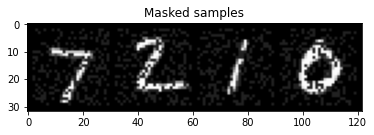


n: 275
[[130 295 279 ... 295 173 246]
 [ 15  35 706 ... 529 143 538]
 [218 144 168 ... 395  11  15]
 [472 249 728 ... 730 310 262]]


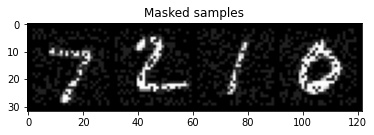

[[639 472 318 ...  81 780  91]
 [266  39 629 ... 139 476 394]
 [511 302 655 ... 505 192 456]
 [412 587 695 ... 158 456 250]]


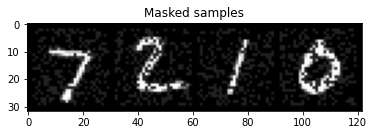


n: 300
[[130 295 279 ... 295 173 246]
 [ 15  35 706 ... 529 143 538]
 [218 144 168 ... 395  11  15]
 [472 249 728 ... 730 310 262]]


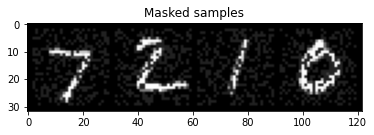

[[639 472 318 ...  81 780  91]
 [266  39 629 ... 139 476 394]
 [511 302 655 ... 505 192 456]
 [412 587 695 ... 158 456 250]]


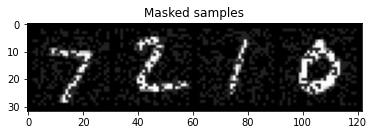


n: 325
[[130 295 279 ... 295 173 246]
 [ 15  35 706 ... 529 143 538]
 [218 144 168 ... 395  11  15]
 [472 249 728 ... 730 310 262]]


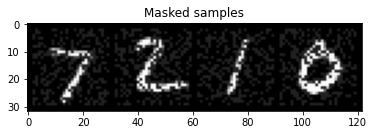

[[639 472 318 ...  81 780  91]
 [266  39 629 ... 139 476 394]
 [511 302 655 ... 505 192 456]
 [412 587 695 ... 158 456 250]]


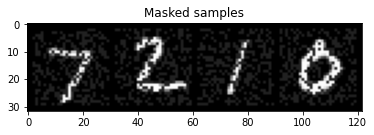


n: 350
[[130 295 279 ... 295 173 246]
 [ 15  35 706 ... 529 143 538]
 [218 144 168 ... 395  11  15]
 [472 249 728 ... 730 310 262]]


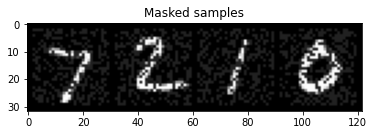

[[639 472 318 ...  81 780  91]
 [266  39 629 ... 139 476 394]
 [511 302 655 ... 505 192 456]
 [412 587 695 ... 158 456 250]]


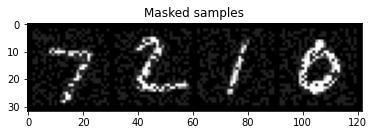


n: 375
[[130 295 279 ... 295 173 246]
 [ 15  35 706 ... 529 143 538]
 [218 144 168 ... 395  11  15]
 [472 249 728 ... 730 310 262]]


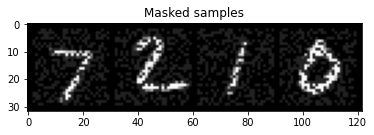

[[639 472 318 ...  81 780  91]
 [266  39 629 ... 139 476 394]
 [511 302 655 ... 505 192 456]
 [412 587 695 ... 158 456 250]]


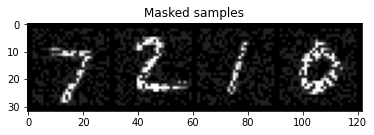

In [31]:
for n_idx, n_data in enumerate(debug_data["pert_data"]):
    print(f"n: {mask_range[n_idx+1]}")
    for pert_idx in range(2):
        print(pert_data["indices"][pert_idx].cpu().numpy())
        masked = n_data["masked_samples"][pert_idx]
        imshow(dataset.denormalize(masked), title="Masked samples")
    print()

In [66]:
rows = [
    Div(text=f"<h1>Sensitivity-n test report</h1>"),
    Div(text="<p>Samples:</p>"),
]
for n_idx, n in enumerate(mask_range):
    print(f"n: {n}")
    print(f"========")
    rows.append(Div(text=f"<h1>n: {n}</h1>"))
    cur_data = debug_data[n_idx]
    for pert in range(n_perturbations):
        print(f"Perturbation {pert} indices:")
        print(cur_data['indices'].cpu().numpy())
        rows.append(Div(text=f"<h2>Perturbation {pert}</h2>"))

n: 0


KeyError: 0